In [1]:
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.integrate import quad, dblquad, tplquad

In [2]:
order = 0
ang_dis = 0.0

# Bessel function of first kind
print(f'J_{order}({ang_dis}) = {special.jn(order, ang_dis)}')

ang_dis = 1.0
# Bessel function of second kind
print(f'J_{order}({ang_dis}) = {special.jn(order, ang_dis)}')

J_0(0.0) = 1.0
J_0(1.0) = 0.7651976865579666


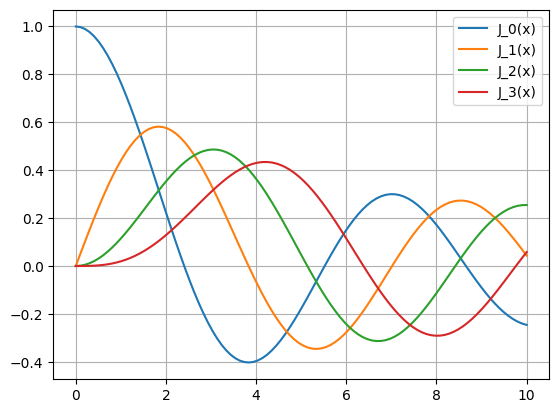

In [3]:
x = np.linspace(0, 10, 100)
for n in range(4):
  plt.plot(x, special.jn(n, x), label=f'J_{n}(x)')

plt.grid()
plt.legend()

In [4]:
x_lower, x_upper = 0.0, 1.0
val, abserr = quad(lambda x:x**2, x_lower, x_upper)
print(f'Value = {val} Error = {abserr}')

Value = 0.33333333333333337 Error = 3.700743415417189e-15


In [5]:
# We can pass a function with multiple variables as well
integral, abs_error = quad(lambda x,n: special.jn(n, x)/x, 0, 1, args=(1,))
# when passing multiple variables first vairable following lambda is the one to integrate with respect to
# extra variables must be specified using args parameter which takes a tuple

print(integral)

0.47967982434482676


In [6]:
x_range = np.linspace(1e-10, 30, 300)
order = 1

integral_res = [quad(lambda t,n:special.jn(n, t)/t, 0, x, args=(order,)) for x in x_range]
print(integral_res)

[(4.9999999999999976e-11, 5.55111512312578e-25), (0.050146186361947724, 5.567345069617837e-16), (0.10016627307439531, 1.1120690265808454e-15), (0.14993479477811233, 1.66461061355108e-15), (0.1993275504572563, 2.212980359597786e-15), (0.2482222257468895, 2.7558203024790007e-15), (0.2964990033418729, 3.2918002028855853e-15), (0.3440411577376102, 3.819624147389902e-15), (0.39073563059329647, 4.338036936261074e-15), (0.43647358314448104, 4.845830216476455e-15), (0.48115092225286793, 5.341848322047626e-15), (0.5246687968661297, 5.824993785831564e-15), (0.5669340618677107, 6.294232489297953e-15), (0.607859706524593, 6.748598419254936e-15), (0.6473652449880755, 7.187198003278665e-15), (0.6853770665669234, 7.609213998526469e-15), (0.7218287437718022, 8.013908911717073e-15), (0.7566612964226332, 8.40062793131128e-15), (0.7898234104142032, 8.768801356298131e-15), (0.8212716100477785, 9.117946509460167e-15), (0.8509703831552873, 9.447669126530913e-15), (0.8788922585654789, 9.757664216242012e-15),

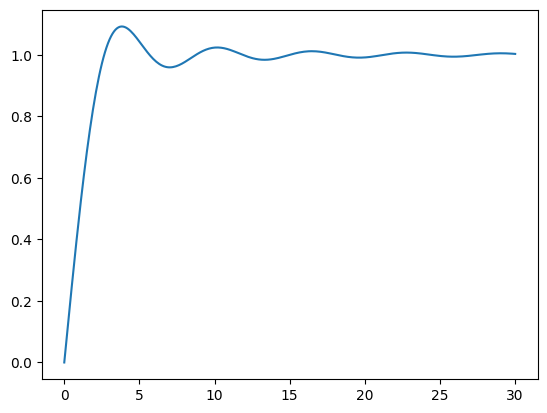

In [7]:
plt.plot(x_range, [result[0] for result in integral_res])

#### Gaussian Integral

In [9]:
def integrand(x, y):
  return np.exp(-x**2 - y**2)

x_a = 0
x_b = 10
y_a = 0
y_b = 10

integral, abs_error = dblquad(integrand, x_a, x_b, lambda x: y_a, lambda x: y_b)
print(integral, abs_error)

0.7853981633974476 1.3753098510194181e-08
